<a href="https://colab.research.google.com/github/velish-qubadov/Deep-Learning/blob/main/10Food-Classes-TransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip


--2025-07-27 13:44:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.4.207, 74.125.24.207, 172.253.118.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.4.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip’

101_food_classes_10 100%[===================>]   1.51G  22.4MB/s    in 71s     

2025-07-27 13:45:12 (21.8 MB/s) - ‘101_food_classes_10_percent.zip’ saved [1625420029/1625420029]



In [5]:
import zipfile
zip_f=zipfile.ZipFile('/content/101_food_classes_10_percent.zip')
zip_f.extractall()
zip_f.close()
train_dir = "101_food_classes_10_percent/train/"
test_dir = "101_food_classes_10_percent/test/"

In [6]:
import tensorflow as tf

IMG_SIZE = (224, 224)
batch_size = 32


train_data_all_10_percent = tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                                                image_size=IMG_SIZE,
                                                                                label_mode='categorical',
                                                                                batch_size=batch_size)
test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                                image_size=IMG_SIZE,
                                                                label_mode='categorical',
                                                                shuffle = False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [7]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomHeight(0.2),
    tf.keras.layers.RandomWidth(0.2)
],name='data_augmentation')

In [8]:
base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)
base_model.trainable = False

24274472/24274472 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [10]:
input_shape=(224,224,3)
inputs= tf.keras.layers.Input(shape=input_shape, name='input_layer')
x=data_augmentation(inputs)
x=base_model(x, training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_poolng_layer')(x)
outputs=tf.keras.layers.Dense(len(train_data_all_10_percent.class_names),activation='softmax',name='output_layer')(x)

model_0=tf.keras.Model(inputs, outputs)

In [11]:
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
                metrics=['accuracy'])

In [12]:
history_0 = model_0.fit(train_data_all_10_percent,
                        epochs=5,
                        validation_data=test_data)

Epoch 1/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 155s 560ms/step - accuracy: 0.1298 - loss: 4.0938 - val_accuracy: 0.4277 - val_loss: 2.5458
Epoch 2/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 112s 475ms/step - accuracy: 0.4097 - loss: 2.5950 - val_accuracy: 0.5015 - val_loss: 2.0476
Epoch 3/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 166s 577ms/step - accuracy: 0.4935 - loss: 2.1652 - val_accuracy: 0.5321 - val_loss: 1.8386
Epoch 4/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 105s 422ms/step - accuracy: 0.5302 - loss: 1.9423 - val_accuracy: 0.5570 - val_loss: 1.7169
Epoch 5/5
237/237 ━━━━━━━━━━━━━━━━━━━━ 98s 413ms/step - accuracy: 0.5560 - loss: 1.8213 - val_accuracy: 0.5672 - val_loss: 1.6532


In [13]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))
  plt.plot(epochs, loss, label = 'training_loss')
  plt.plot(epochs, val_loss, label = 'val_loss')
  plt.title('loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = 'training_accuracy')
  plt.plot(epochs, val_accuracy, label = 'val_accuracy')
  plt.title('Accuracy')
  plt.xlabel("Epochs")
  plt.legend()


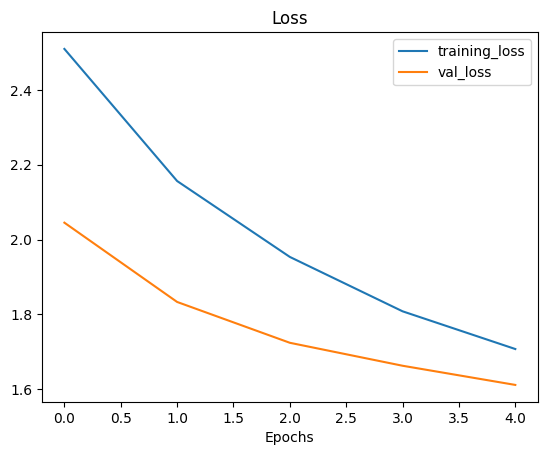

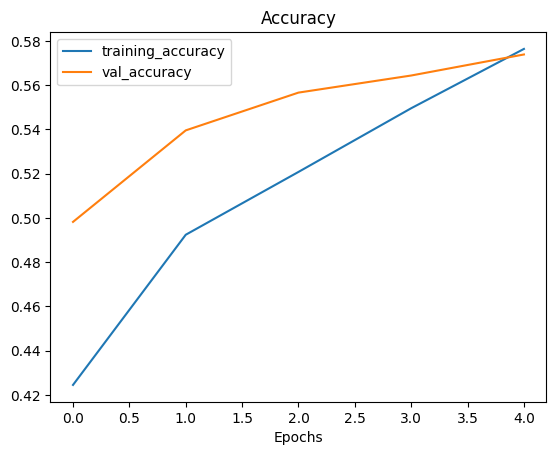

In [ ]:
plot_loss_curves(history_0)

#Fine-Tuning

In [ ]:
model_0_best_model=model_0.layers[2]

In [ ]:
model_0_best_model.trainable= False

In [ ]:
for layer in (model_0_best_model.layers[-5:]):
  layer.trainable = True

In [ ]:
for layer_number, layer in enumerate(model_0_best_model.layers):
  print(layer_number, '|', layer.name, '|', layer.trainable)

0 | input_layer | False
1 | rescaling | False
2 | normalization | False
3 | stem_conv | False
4 | stem_bn | False
5 | stem_activation | False
6 | block1a_project_conv | False
7 | block1a_project_bn | False
8 | block1a_project_activation | False
9 | block2a_expand_conv | False
10 | block2a_expand_bn | False
11 | block2a_expand_activation | False
12 | block2a_project_conv | False
13 | block2a_project_bn | False
14 | block2b_expand_conv | False
15 | block2b_expand_bn | False
16 | block2b_expand_activation | False
17 | block2b_project_conv | False
18 | block2b_project_bn | False
19 | block2b_drop | False
20 | block2b_add | False
21 | block3a_expand_conv | False
22 | block3a_expand_bn | False
23 | block3a_expand_activation | False
24 | block3a_project_conv | False
25 | block3a_project_bn | False
26 | block3b_expand_conv | False
27 | block3b_expand_bn | False
28 | block3b_expand_activation | False
29 | block3b_project_conv | False
30 | block3b_project_bn | False
31 | block3b_drop | False
32 

In [ ]:
model_0.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=['accuracy'])

In [ ]:
checkpoint_path = "101_classes_10_percent_data_model_checkpoint.weights.h5"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                         save_weights_only=True, # save only the model weights
                                                         monitor="val_accuracy", # save the model weights which score the best validation accuracy
                                                         save_best_only=True)


In [ ]:
fine_tune_epochs = 10
history_all_classes_10_percent_fine_tune = model_0.fit(train_data_all_10_percent,
                                                       epochs=fine_tune_epochs,
                                                       steps_per_epoch = int(len(train_data_all_10_percent)),
                                                       validation_data=test_data,
                                                       validation_steps=int((0.25 * len(test_data))),
                                                       initial_epoch=history_0.epoch[-1],
                                                       callbacks=[checkpoint_callback])

Epoch 5/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 68s 226ms/step - accuracy: 0.5803 - loss: 1.8569 - val_accuracy: 0.5155 - val_loss: 1.8969
Epoch 6/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 50s 210ms/step - accuracy: 0.6218 - loss: 1.6857 - val_accuracy: 0.5281 - val_loss: 1.8079
Epoch 7/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 78s 193ms/step - accuracy: 0.6361 - loss: 1.5786 - val_accuracy: 0.5351 - val_loss: 1.7746
Epoch 8/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 81s 190ms/step - accuracy: 0.6418 - loss: 1.5334 - val_accuracy: 0.5365 - val_loss: 1.7425
Epoch 9/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 43s 182ms/step - accuracy: 0.6512 - loss: 1.4687 - val_accuracy: 0.5476 - val_loss: 1.7058
Epoch 10/10
237/237 ━━━━━━━━━━━━━━━━━━━━ 82s 182ms/step - accuracy: 0.6499 - loss: 1.4573 - val_accuracy: 0.5562 - val_loss: 1.6806


In [ ]:
for layer in model_0.layers:
  print(layer.name, layer.trainable)

input_layer True
data_augmentation True
efficientnetv2-b0 False
global_average_poolng_layer True
output_layer True


In [ ]:
for layer_number, layer in enumerate(base_model.layers):
  print(layer_number, layer.name, layer.trainable)

0 input_layer False
1 rescaling False
2 normalization False
3 stem_conv False
4 stem_bn False
5 stem_activation False
6 block1a_project_conv False
7 block1a_project_bn False
8 block1a_project_activation False
9 block2a_expand_conv False
10 block2a_expand_bn False
11 block2a_expand_activation False
12 block2a_project_conv False
13 block2a_project_bn False
14 block2b_expand_conv False
15 block2b_expand_bn False
16 block2b_expand_activation False
17 block2b_project_conv False
18 block2b_project_bn False
19 block2b_drop False
20 block2b_add False
21 block3a_expand_conv False
22 block3a_expand_bn False
23 block3a_expand_activation False
24 block3a_project_conv False
25 block3a_project_bn False
26 block3b_expand_conv False
27 block3b_expand_bn False
28 block3b_expand_activation False
29 block3b_project_conv False
30 block3b_project_bn False
31 block3b_drop False
32 block3b_add False
33 block4a_expand_conv False
34 block4a_expand_bn False
35 block4a_expand_activation False
36 block4a_dwconv2 

In [ ]:
results_all_classes_10_percent_fine_tune = model_0.evaluate(test_data)
results_all_classes_10_percent_fine_tune

790/790 ━━━━━━━━━━━━━━━━━━━━ 51s 65ms/step - accuracy: 0.5844 - loss: 1.5832


[1.4677155017852783, 0.6075247526168823]

In [ ]:
plot_loss_curves(history_all_classes_10_percent_fine_tune)

In [ ]:
def compare_historys(original_history, new_history, initial_epochs=5):

    acc = original_history.history["accuracy"]
    loss = original_history.history["loss"]

    print(len(acc))

    val_acc = original_history.history["val_accuracy"]
    val_loss = original_history.history["val_loss"]

    total_acc = acc + new_history.history["accuracy"]
    total_loss = loss + new_history.history["loss"]

    total_val_acc = val_acc + new_history.history["val_accuracy"]
    total_val_loss = val_loss + new_history.history["val_loss"]

    print(len(total_acc))
    print(total_acc)

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(total_acc, label='Training Accuracy')
    plt.plot(total_val_acc, label='Validation Accuracy')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(total_loss, label='Training Loss')
    plt.plot(total_val_loss, label='Validation Loss')
    plt.plot([initial_epochs-1, initial_epochs-1],
              plt.ylim(), label='Start Fine Tuning') # reshift plot around epochs
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

5
11
[0.4245544672012329, 0.49240922927856445, 0.5207920670509338, 0.5495709776878357, 0.5763696432113647, 0.5923432111740112, 0.6216501593589783, 0.6261386275291443, 0.6401320099830627, 0.6429042816162109, 0.6524092555046082]


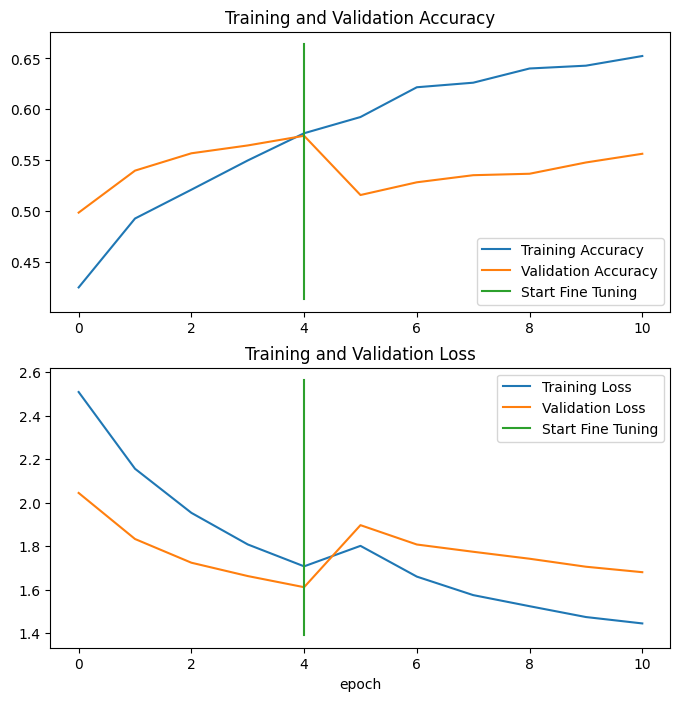

In [ ]:
compare_historys(original_history=history_0,
                 new_history=history_all_classes_10_percent_fine_tune,
                 initial_epochs=5)

In [ ]:
pred_probs = model_0.predict(test_data, verbose=1)

790/790 ━━━━━━━━━━━━━━━━━━━━ 58s 71ms/step


In [ ]:
len(pred_probs)

25250

In [ ]:
pred_probs.shape

(25250, 101)

In [ ]:
pred_probs[0]

array([2.34986772e-03, 4.22560901e-04, 1.29809499e-01, 1.58902221e-05,
       1.55917311e-04, 9.95512935e-04, 1.98013469e-04, 1.82783129e-04,
       3.68210045e-03, 3.64677957e-03, 1.42168210e-04, 3.05659574e-04,
       6.69025001e-04, 1.53371264e-04, 2.31012665e-02, 1.90145895e-02,
       9.83023434e-04, 2.31423834e-03, 5.37196966e-03, 2.14410829e-03,
       5.54790162e-03, 9.26726570e-05, 2.32057588e-04, 3.09215829e-04,
       5.94745914e-04, 7.12816883e-03, 2.84998561e-03, 1.16600713e-04,
       1.80176180e-02, 5.39326749e-04, 2.76858045e-05, 6.14215911e-04,
       1.12209618e-02, 8.02850234e-04, 8.09476338e-03, 2.23719384e-04,
       3.47600877e-03, 2.24982272e-03, 3.09915822e-02, 5.71157027e-04,
       1.46595819e-03, 4.21695970e-03, 3.03702313e-04, 5.81158092e-04,
       1.30767003e-03, 5.02562791e-04, 1.07894617e-03, 5.42842608e-04,
       1.01834838e-03, 4.02459092e-02, 1.85584452e-03, 1.57112756e-03,
       2.00808849e-02, 2.59796884e-02, 9.58219753e-05, 5.28719230e-03,
      

In [ ]:
pred_classes = pred_probs.argmax(axis=1)
pred_classes[:10]

array([85,  0, 28,  0,  8, 78, 29, 46,  9, 41])

In [ ]:
y_labels = []
for images, labels in test_data.unbatch():      # unbatch the test data and get images and labels
  y_labels.append(labels.numpy().argmax())

In [ ]:
y_labels[:10]         # It's unshuffled so we'll get 0s

[np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0),
 np.int64(0)]

In [ ]:
pred_classes[:10]

array([85,  0, 28,  0,  8, 78, 29, 46,  9, 41])

In [ ]:
from sklearn.metrics import accuracy_score

sklearn_accuracy = accuracy_score(y_labels, pred_classes)
sklearn_accuracy

0.6075247524752475

In [ ]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15, norm=False, savefig=False):

  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)


  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes),
         yticks=np.arange(n_classes),
         xticklabels=labels,
         yticklabels=labels)

  plt.xticks(rotation=70, fontsize=text_size)
  plt.yticks(fontsize=text_size)


  threshold = (cm.max() + cm.min()) / 2.


  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    if norm:
      plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)
    else:
      plt.text(j, i, f"{cm[i, j]}",
              horizontalalignment="center",
              color="white" if cm[i, j] > threshold else "black",
              size=text_size)

In [ ]:
class_names = test_data.class_names
class_names[:10]

['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito']

In [ ]:
make_confusion_matrix(y_true=y_labels,
                      y_pred=pred_classes,
                      classes=class_names,
                      figsize=(100, 100),
                      text_size=20)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_labels, pred_classes))

              precision    recall  f1-score   support

           0       0.37      0.12      0.18       250
           1       0.56      0.73      0.63       250
           2       0.64      0.58      0.61       250
           3       0.67      0.56      0.61       250
           4       0.61      0.45      0.51       250
           5       0.62      0.36      0.46       250
           6       0.72      0.78      0.75       250
           7       0.79      0.76      0.77       250
           8       0.29      0.54      0.38       250
           9       0.33      0.78      0.46       250
          10       0.56      0.48      0.52       250
          11       0.60      0.58      0.59       250
          12       0.77      0.57      0.65       250
          13       0.59      0.57      0.58       250
          14       0.54      0.61      0.57       250
          15       0.42      0.30      0.35       250
          16       0.69      0.52      0.60       250
          17       0.38    

In [ ]:
classification_report_dict = classification_report(y_labels, pred_classes, output_dict=True)
classification_report_dict

{'0': {'precision': 0.3717948717948718,
  'recall': 0.116,
  'f1-score': 0.17682926829268292,
  'support': 250.0},
 '1': {'precision': 0.5562310030395137,
  'recall': 0.732,
  'f1-score': 0.6321243523316062,
  'support': 250.0},
 '2': {'precision': 0.64,
  'recall': 0.576,
  'f1-score': 0.6063157894736843,
  'support': 250.0},
 '3': {'precision': 0.6746411483253588,
  'recall': 0.564,
  'f1-score': 0.6143790849673203,
  'support': 250.0},
 '4': {'precision': 0.6054054054054054,
  'recall': 0.448,
  'f1-score': 0.5149425287356322,
  'support': 250.0},
 '5': {'precision': 0.6206896551724138,
  'recall': 0.36,
  'f1-score': 0.45569620253164556,
  'support': 250.0},
 '6': {'precision': 0.724907063197026,
  'recall': 0.78,
  'f1-score': 0.7514450867052023,
  'support': 250.0},
 '7': {'precision': 0.7860082304526749,
  'recall': 0.764,
  'f1-score': 0.7748478701825557,
  'support': 250.0},
 '8': {'precision': 0.2905982905982906,
  'recall': 0.544,
  'f1-score': 0.3788300835654596,
  'support

In [ ]:
class_f1_scores = {}

for k, v in classification_report_dict.items():
  if k == 'accuracy':
    break
  else:
    class_f1_scores[class_names[int(k)]] = v['f1-score']
class_f1_scores

{'apple_pie': 0.17682926829268292,
 'baby_back_ribs': 0.6321243523316062,
 'baklava': 0.6063157894736843,
 'beef_carpaccio': 0.6143790849673203,
 'beef_tartare': 0.5149425287356322,
 'beet_salad': 0.45569620253164556,
 'beignets': 0.7514450867052023,
 'bibimbap': 0.7748478701825557,
 'bread_pudding': 0.3788300835654596,
 'breakfast_burrito': 0.4626334519572954,
 'bruschetta': 0.5161290322580645,
 'caesar_salad': 0.5882352941176471,
 'cannoli': 0.6528735632183909,
 'caprese_salad': 0.5824847250509165,
 'carrot_cake': 0.5730337078651685,
 'ceviche': 0.3510392609699769,
 'cheese_plate': 0.5954545454545455,
 'cheesecake': 0.43205574912891986,
 'chicken_curry': 0.48951048951048953,
 'chicken_quesadilla': 0.5719844357976653,
 'chicken_wings': 0.7033398821218074,
 'chocolate_cake': 0.5848214285714286,
 'chocolate_mousse': 0.4199134199134199,
 'churros': 0.7182795698924731,
 'clam_chowder': 0.7404580152671756,
 'club_sandwich': 0.6453900709219859,
 'crab_cakes': 0.4331395348837209,
 'creme_bru

In [ ]:
import pandas as pd
f1_scores = pd.DataFrame({'class_name': list(class_f1_scores.keys()),
                          'f1-score': list(class_f1_scores.values())}).sort_values('f1-score', ascending=False)
f1_scores.head()

class_name  f1-score
33            edamame  0.959064
63           macarons  0.871681
32          dumplings  0.852590
54  hot_and_sour_soup  0.850299
86            sashimi  0.838583

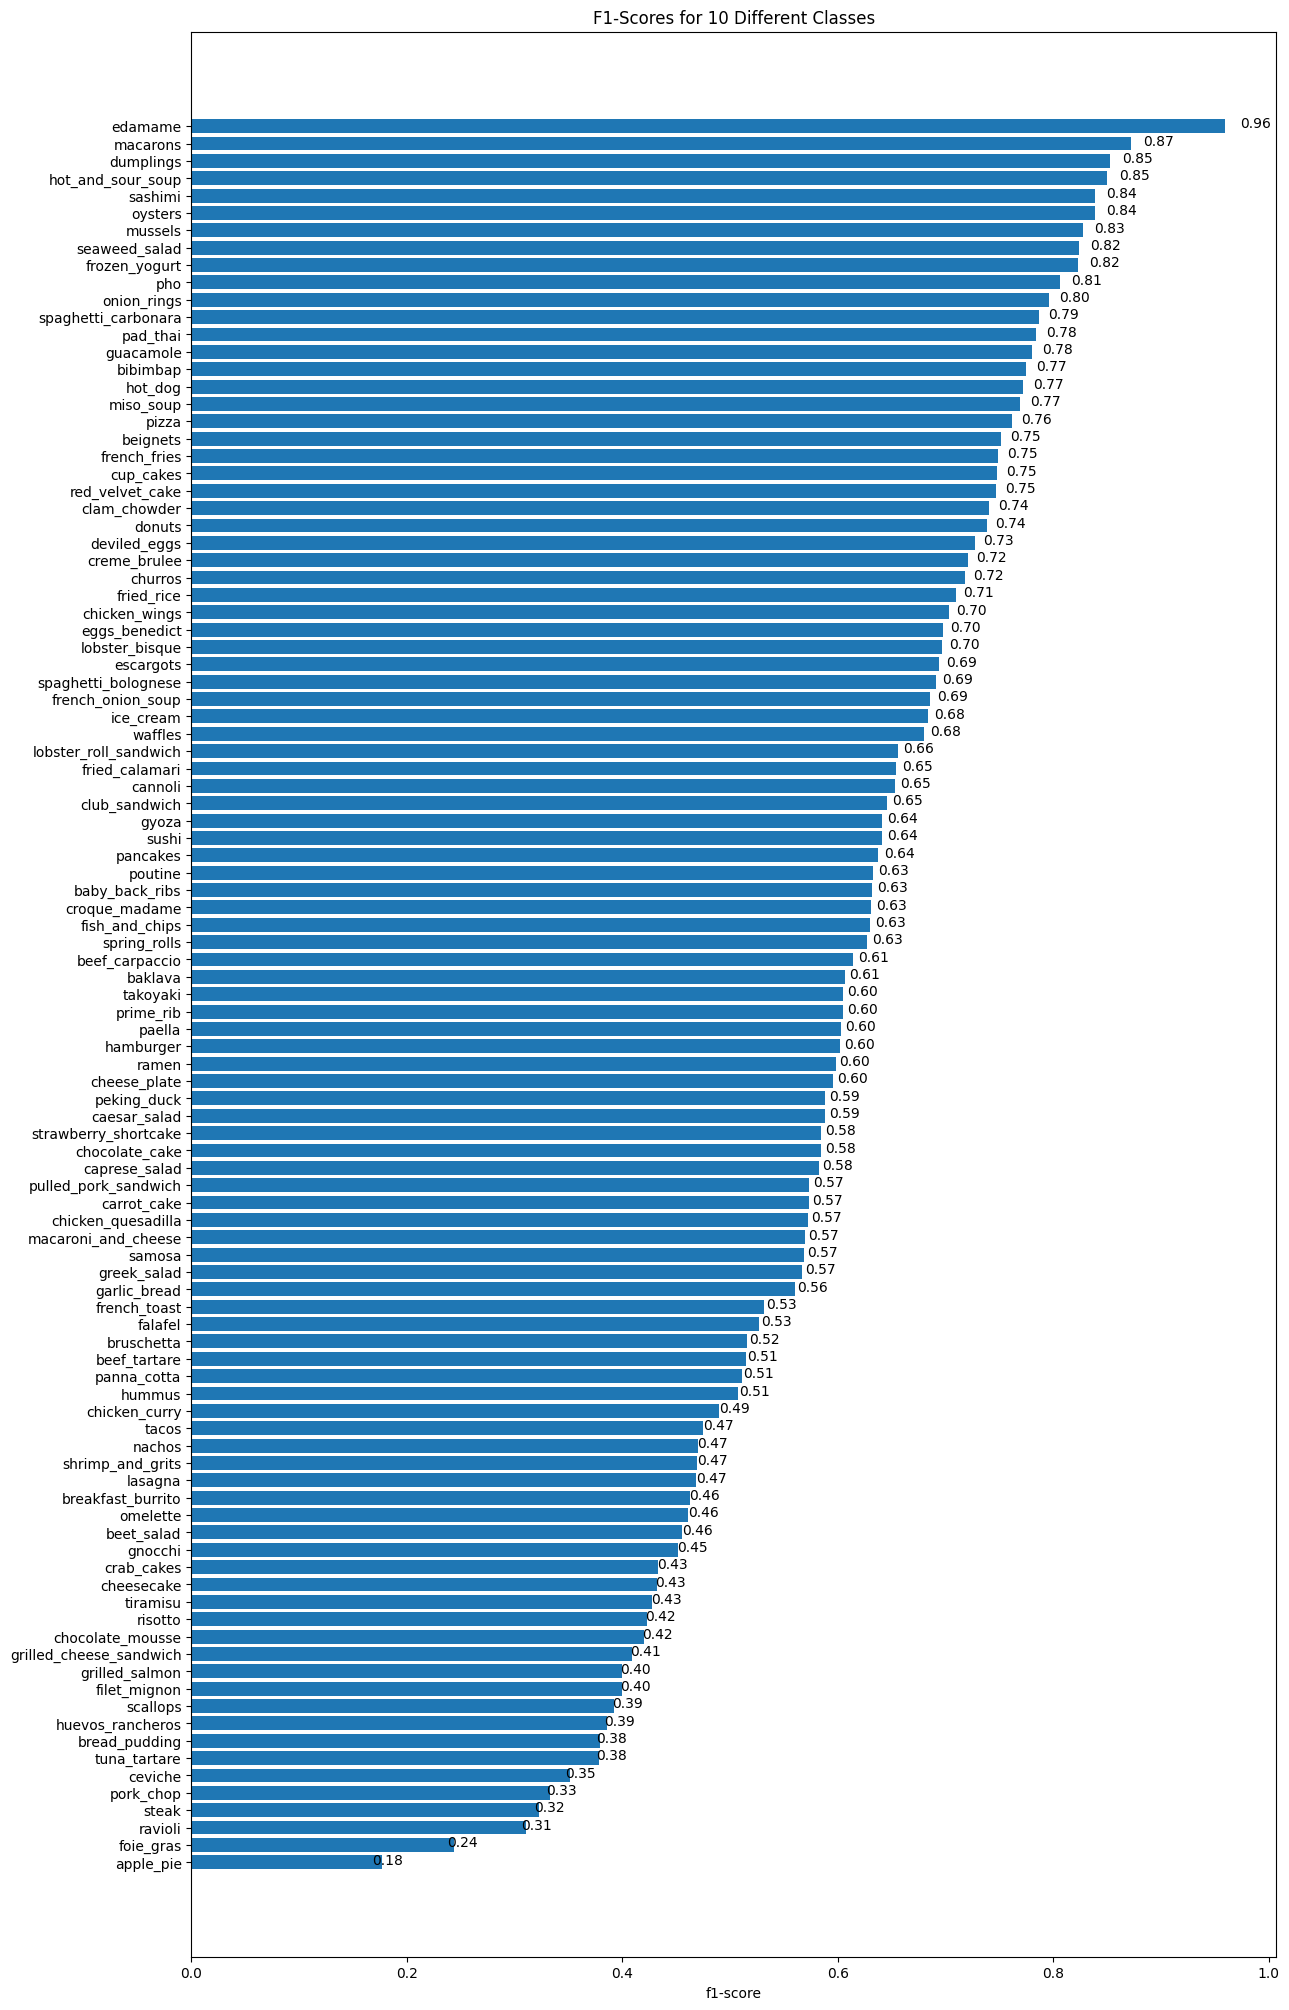

In [ ]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 25))
scores = ax.barh(range(len(f1_scores)), f1_scores["f1-score"].values)
ax.set_yticks(range(len(f1_scores)))
ax.set_yticklabels(list(f1_scores["class_name"]))
ax.set_xlabel("f1-score")
ax.set_title("F1-Scores for 10 Different Classes")
ax.invert_yaxis();

def autolabel(rects):

  for rect in rects:
    width = rect.get_width()
    ax.text(1.03*width, rect.get_y() + rect.get_height()/1.2,
            f"{width:.2f}",
            ha='center', va='bottom')

autolabel(scores)

Gördüyümüz kimi, alma piroqu (apple pie) proqnozlaşdırmada ən zəif kateqoriyadır. Bu problemi həll etmək üçün daha çox məlumat (data) əldə edə bilərik.




In [ ]:
def load_and_prep_image(filename, img_shape=224, scale=True):
  img = tf.io.read_file(filename)
  img = tf.io.decode_image(img)
  img = tf.image.resize(img, [img_shape, img_shape])
  if scale:
    return img/255.
  else:
    return img

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


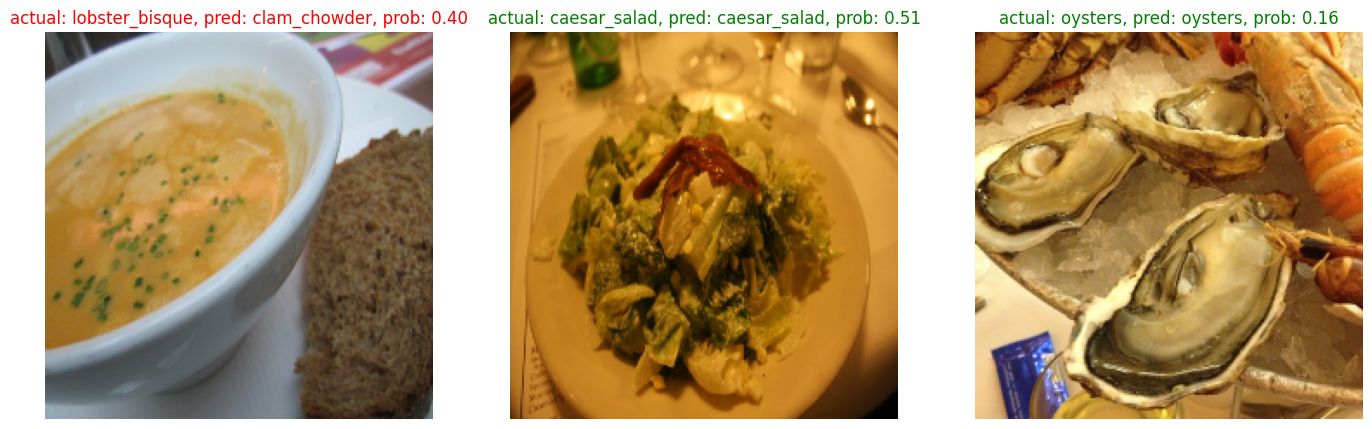

In [ ]:
import os
import random

plt.figure(figsize=(17, 10))
for i in range(3):
  class_name = random.choice(class_names)
  filename = random.choice(os.listdir(test_dir + '/' + class_name))
  filepath = test_dir + class_name + '/' + filename

  img = load_and_prep_image(filepath, scale=False)
  pred_prob = model_0.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred_prob.argmax()]

  plt.subplot(1, 3, i+1)
  plt.imshow(img/255.)
  if class_name == pred_class:
    title_color = 'g'
  else:
    title_color = 'r'
  plt.title(f'actual: {class_name}, pred: {pred_class}, prob: {pred_prob.max():.2f}', c=title_color)
  plt.axis(False);


In [ ]:
filepaths = []
for filepath in test_data.list_files('101_food_classes_10_percent/test/*/*.jpg',
                                     shuffle=False):
  filepaths.append(filepath.numpy())
filepaths[:10]

[b'101_food_classes_10_percent/test/apple_pie/1011328.jpg',
 b'101_food_classes_10_percent/test/apple_pie/101251.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1034399.jpg',
 b'101_food_classes_10_percent/test/apple_pie/103801.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1038694.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1047447.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1068632.jpg',
 b'101_food_classes_10_percent/test/apple_pie/110043.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1106961.jpg',
 b'101_food_classes_10_percent/test/apple_pie/1113017.jpg']

In [ ]:
import pandas as pd
pred_df = pd.DataFrame({'img_path': filepaths,
                        'y_true': y_labels,
                        'y_predict': pred_classes,
                        'pred_conf': pred_probs.max(axis=1),
                        'y_true_classname': [class_names[i] for i in y_labels],
                        'y_pred_classname': [class_names[i] for i in pred_classes]})
pred_df.head()


img_path  y_true  y_predict  \
0  b'101_food_classes_10_percent/test/apple_pie/1...       0         85   
1  b'101_food_classes_10_percent/test/apple_pie/1...       0          0   
2  b'101_food_classes_10_percent/test/apple_pie/1...       0         28   
3  b'101_food_classes_10_percent/test/apple_pie/1...       0          0   
4  b'101_food_classes_10_percent/test/apple_pie/1...       0          8   

   pred_conf y_true_classname y_pred_classname  
0   0.351721        apple_pie           samosa  
1   0.383273        apple_pie        apple_pie  
2   0.147808        apple_pie    croque_madame  
3   0.278214        apple_pie        apple_pie  
4   0.575135        apple_pie    bread_pudding

In [ ]:
pred_df['inequal'] = (pred_df['y_true_classname'] != pred_df['y_pred_classname'])

In [ ]:
inequal_table = pred_df[pred_df['inequal']==True]
inequal_table.sort_values(by='pred_conf', ascending=False, inplace=True)

<ipython-input-74-98ef52149342>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inequal_table.sort_values(by='pred_conf', ascending=False, inplace=True)


In [ ]:
inequal_table

img_path  y_true  y_predict  \
23797  b'101_food_classes_10_percent/test/sushi/16593...      95         86   
4836   b'101_food_classes_10_percent/test/chicken_que...      19          9   
18001  b'101_food_classes_10_percent/test/pancakes/10...      72         67   
14482  b'101_food_classes_10_percent/test/hummus/8476...      57         51   
9402   b'101_food_classes_10_percent/test/filet_migno...      37         79   
...                                                  ...     ...        ...   
4068   b'101_food_classes_10_percent/test/cheese_plat...      16          9   
10807  b'101_food_classes_10_percent/test/fried_calam...      43         18   
24101  b'101_food_classes_10_percent/test/tacos/25658...      96         92   
23852  b'101_food_classes_10_percent/test/sushi/26402...      95         10   
4134   b'101_food_classes_10_percent/test/cheese_plat...      16          8   

       pred_conf    y_true_classname   y_pred_classname  inequal  
23797   0.990819               sushi            sashimi     True  
4836    0.990124  chicken_quesadilla  breakfast_burrito     True  
18001   0.990080            pancakes           omelette     True  
14482   0.987117              hummus          guacamole     True  
9402    0.983385        filet_mignon          prime_rib     True  
...          ...                 ...                ...      ...  
4068    0.069753        cheese_plate  breakfast_burrito     True  
10807   0.067811      fried_calamari      chicken_curry     True  
24101   0.067437               tacos       spring_rolls     True  
23852   0.066743               sushi         bruschetta     True  
4134    0.060909        cheese_plate      bread_pudding     True  

[9910 rows x 7 columns]

"Aydındır ki, modelimiz səhvlər edir, xüsusilə yeməklər bir-birinə oxşayanda."

Yəni model oxşar görünüşlü yeməkləri qarışdırır və səhv proqnoz verir.



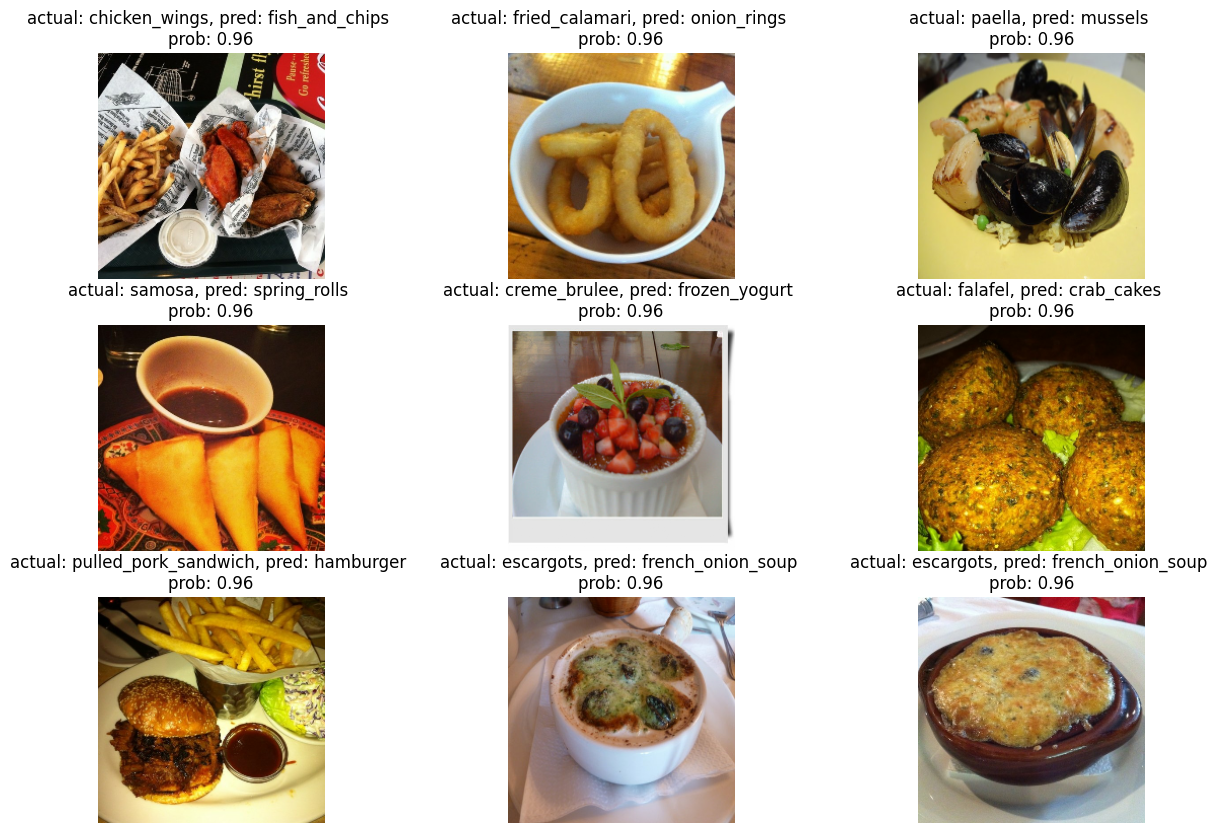

In [ ]:

images_to_view = 9
start_index=10
plt.figure(figsize=(15, 10))
for i, row in enumerate(inequal_table[start_index : start_index + images_to_view].itertuples()):
  plt.subplot(3, 3, i+1)
  img = load_and_prep_image(row[1], scale=True)
  _, _, _, _, pred_prob, y_true, y_pred, _ = row      # only interested ina few parameters of each row
  plt.imshow(img)
  plt.title(f'actual: {y_true}, pred: {y_pred} \nprob: {pred_prob:.2f}')
  plt.axis(False)